In [26]:
# Requisitos

# snscrape
# pip install snscrape

import snscrape.modules.twitter as sntwitter

# Pandas
# pip install pandas

import pandas as pd

# datetime

import datetime

# Matplotlib
# pip install  matplotlib

import matplotlib.pyplot as plt


# Buscamos todos los tweets entre hoy y una semana para atrás, entonces guardamos variables con estas fechas
Hoy = datetime.date.today() + datetime.timedelta(days=1)
Una_Semana = Hoy - datetime.timedelta(days=8)

# Usamos TwitterSearchScraper para recoger la información de los tweets de un usario y meterlo en la lista

# Nombres candidatos
Candidatos = [("Milei","JMilei"),("Espert","jlespert"),("Bullrich","PatoBullrich"),("Larreta","horaciorlarreta"),("Grabois","JuanGrabois"),("Massa","SergioMassa"),("Bregman","myriambregman"),("Solano","Solanopo")]

# Buscamos los tweets de cada candidato
for x in Candidatos:
    informacion = [[tweet.date - datetime.timedelta(hours=3), tweet.likeCount, tweet.retweetCount,tweet.quoteCount, tweet.rawContent,tweet.url,x[0]] for tweet in sntwitter.TwitterSearchScraper('from:{} since:{} until:{}'.format(x[1],Una_Semana,Hoy)).get_items()]
    globals()['tweets_df_' + x[0]] = pd.DataFrame(informacion, columns=["Fecha-Hora", "Cantidad de Likes", "Cantidad de retweets","Veces citado", "Tweet","url","Candidato"])

# Organizamos todo dentro de un dataframe
frames = [tweets_df_Espert,tweets_df_Milei,tweets_df_Bullrich,tweets_df_Bregman,tweets_df_Grabois,tweets_df_Larreta,tweets_df_Massa,tweets_df_Solano]
final = pd.concat(frames)

# Guardamos el dataframe como .csv
final.to_csv('Data/Tweets.csv',index=False)  



Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages
Stopping after 20 empty pages


In [27]:
# Tweets por semana por candidato

Tw_x_Candidato =  final["Candidato"].value_counts()

In [41]:
plt.style.available[:5]

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh']

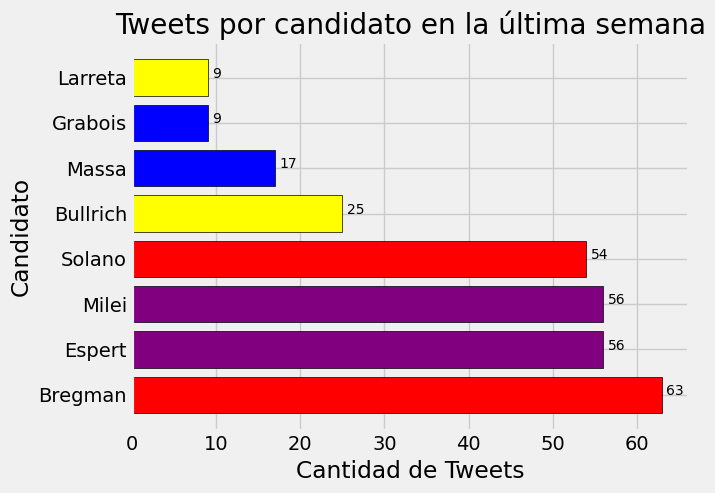

In [46]:
with plt.style.context('fivethirtyeight'):
    for i in range(len(Tw_x_Candidato.index.tolist())):
        if Tw_x_Candidato.index.tolist()[i] in ["Bullrich","Larreta"]:
            plt.barh(Tw_x_Candidato.index.tolist()[i], Tw_x_Candidato.values.tolist()[i], color ='Yellow',edgecolor='Black')
        elif Tw_x_Candidato.index.tolist()[i] in ["Massa","Grabois"]:
            plt.barh(Tw_x_Candidato.index.tolist()[i], Tw_x_Candidato.values.tolist()[i], color ='Blue',edgecolor='Black')
        elif Tw_x_Candidato.index.tolist()[i] in ["Solano","Bregman"]:
            plt.barh(Tw_x_Candidato.index.tolist()[i], Tw_x_Candidato.values.tolist()[i], color ='Red',edgecolor='Black')
        else:
            plt.barh(Tw_x_Candidato.index.tolist()[i], Tw_x_Candidato.values.tolist()[i], color ='Purple',edgecolor='Black')

    for i in range(len(Tw_x_Candidato.index.tolist())):
        plt.text(x = Tw_x_Candidato.values.tolist()[i]+0.5 , y = Tw_x_Candidato.index.tolist()[i], s = Tw_x_Candidato.values.tolist()[i], size = 10)

    plt.ylabel("Candidato")
    plt.xlabel("Cantidad de Tweets")
    plt.title("Tweets por candidato en la última semana")

    plt.show()



In [37]:
Tw_x_Candidato

Bregman     63
Espert      56
Milei       56
Solano      54
Bullrich    25
Massa       17
Grabois      9
Larreta      9
Name: Candidato, dtype: int64